<a href="https://colab.research.google.com/github/guihensn/investment-studies/blob/main/04_Simulando_CARTEIRA_DE_A%C3%87%C3%95ES_e_comparando_com_o_IBOVESPA_Python_para_Investimentos_com_Google_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Ricos pelo Acaso

Link para o vídeo: https://youtu.be/TiNLwmLN-iE

# 1. Importando bibliotecas

In [1]:
!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Obtendo e tratando os dados

In [50]:
tickers = "ABEV3.SA ITSA4.SA WEGE3.SA USIM5.SA VALE3.SA"

carteira = yf.download(tickers, period="5y", auto_adjust=True)["Close"]
ibov = yf.download("^BVSP", period="5y",  auto_adjust=True)["Close"]

[*********************100%***********************]  5 of 5 completed
[*********************100%***********************]  1 of 1 completed


In [51]:
carteira.dropna(inplace=True)
carteira

Ticker,ABEV3.SA,ITSA4.SA,USIM5.SA,VALE3.SA,WEGE3.SA
Date,,,,,
2020-03-27,9.879317,4.748999,3.913567,24.734112,16.408770
2020-03-30,9.926776,4.927785,3.825531,25.764193,15.786943
2020-03-31,9.428461,4.899848,3.937577,26.658567,15.578120
2020-04-01,9.246534,4.614910,3.753503,26.751089,15.049108
2020-04-02,9.483828,4.676365,3.705483,26.387163,15.824069
...,...,...,...,...,...
2025-03-21,13.730000,9.560000,5.790000,57.450001,47.769295
2025-03-24,13.540000,9.580000,5.870000,57.150002,47.360001
2025-03-25,13.600000,9.710000,5.900000,57.340000,47.000000


In [52]:
ibov.dropna(inplace=True)
ibov

Ticker,^BVSP
Date,
2020-03-27,73429.0
2020-03-30,74640.0
2020-03-31,73020.0
2020-04-01,70967.0
2020-04-02,72253.0
...,...
2025-03-21,132345.0
2025-03-24,131321.0
2025-03-25,132068.0


# 3. Resultados

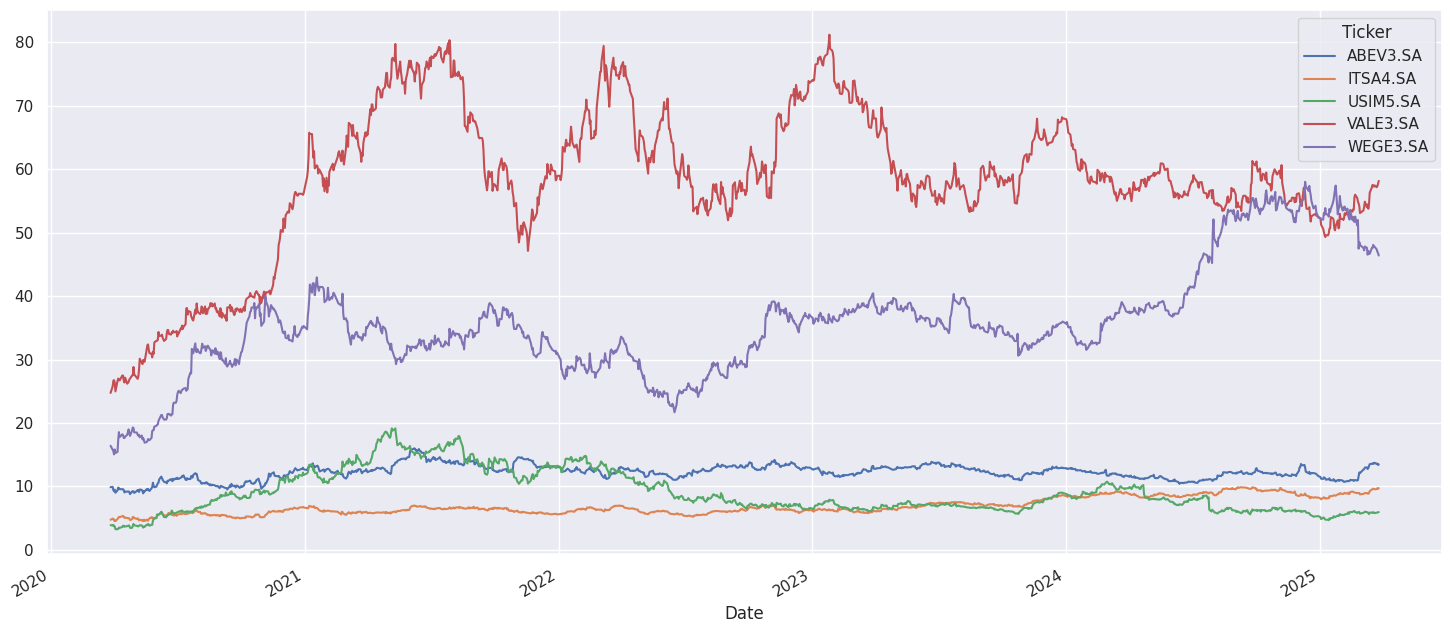

In [53]:
sns.set()
carteira.plot(figsize=(18,8));

In [54]:
carteira_normalizada = (carteira / carteira.iloc[0])*10000
carteira_normalizada.dropna(inplace=True)

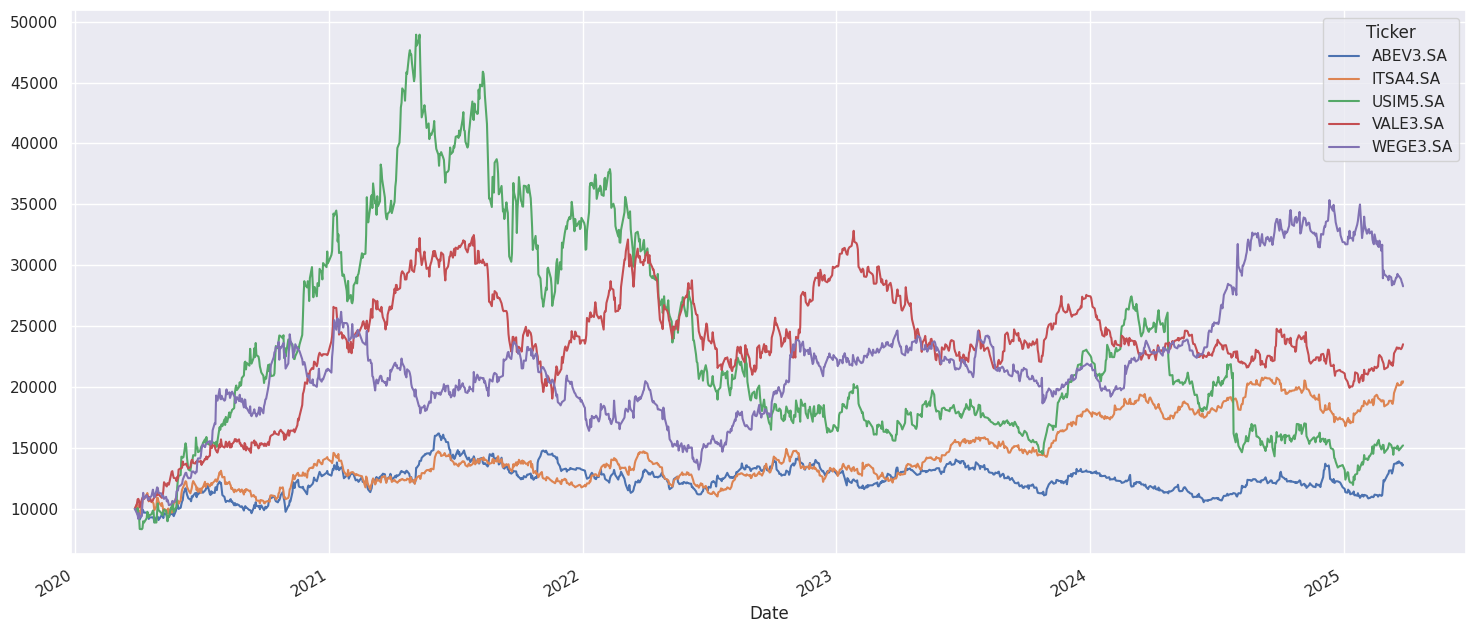

In [55]:
carteira_normalizada.plot(figsize=(18,8));

In [56]:
carteira_normalizada["saldo"] = carteira_normalizada.sum(axis=1)

In [57]:
carteira_normalizada

Ticker,ABEV3.SA,ITSA4.SA,USIM5.SA,VALE3.SA,WEGE3.SA,saldo
Date,,,,,,
2020-03-27,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,50000.000000
2020-03-30,10048.038389,10376.470487,9775.050275,10416.461607,9621.040342,50237.061100
2020-03-31,9543.636270,10317.644494,10061.349316,10778.057308,9493.777172,50194.464559
2020-04-01,9359.487181,9717.647888,9591.002328,10815.463813,9171.380860,48654.982070
2020-04-02,9599.679126,9847.054629,9468.301869,10668.328578,9643.665797,49227.029999
...,...,...,...,...,...,...
2025-03-21,13897.721015,20130.558420,14794.686954,23227.032068,29112.051593,101162.050049
2025-03-24,13705.400457,20172.671513,14999.103851,23105.742394,28862.615384,100845.533599
2025-03-25,13766.133824,20446.413645,15075.760797,23182.558828,28643.220134,101114.087228


In [58]:
ibov_normalizado = (ibov / ibov.iloc[0])*50000
ibov_normalizado

Ticker,^BVSP
Date,
2020-03-27,50000.000000
2020-03-30,50824.606082
2020-03-31,49721.499680
2020-04-01,48323.550641
2020-04-02,49199.226464
...,...
2025-03-21,90117.664683
2025-03-24,89420.392488
2025-03-25,89929.047107


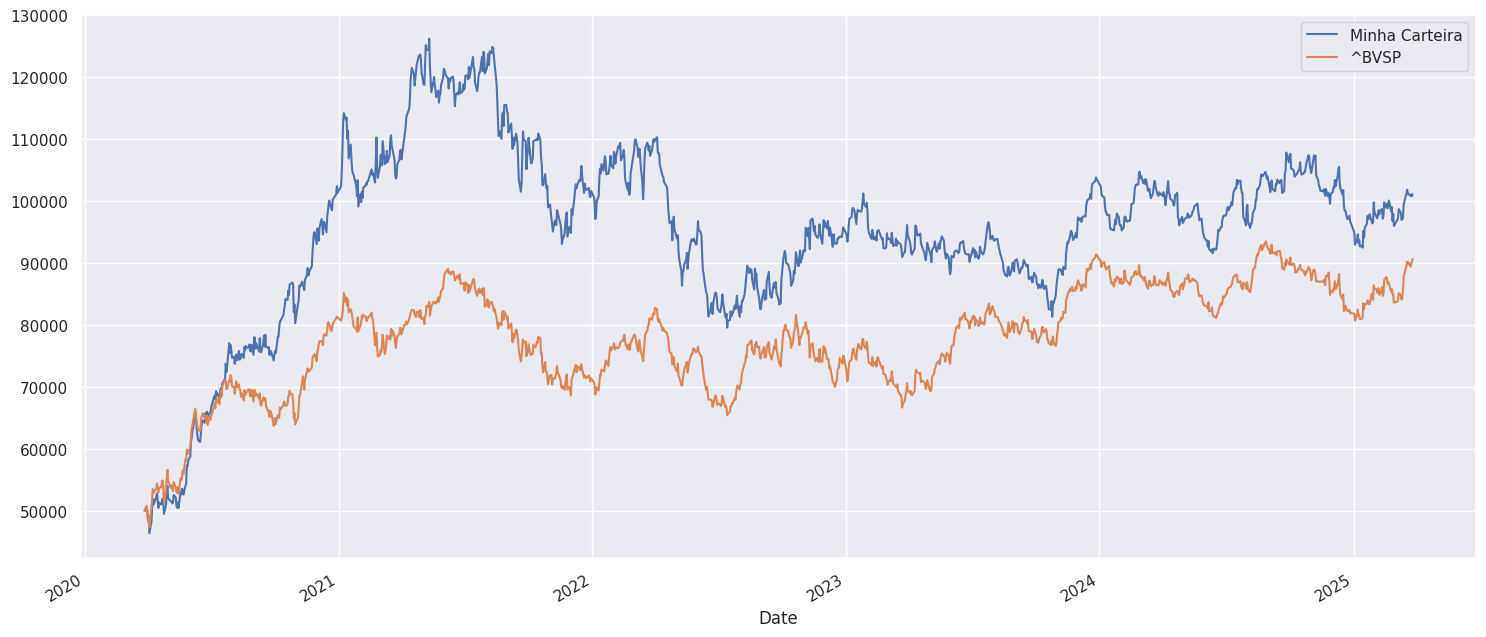

In [61]:
ax = carteira_normalizada["saldo"].plot(figsize=(18, 8), label="Minha Carteira")
ibov_normalizado.plot(ax=ax, label="IBOV")

plt.legend();

In [62]:
carteira_normalizada.describe()

Ticker,ABEV3.SA,ITSA4.SA,USIM5.SA,VALE3.SA,WEGE3.SA,saldo
count,1244.000000,1244.000000,1244.000000,1244.000000,1244.000000,1244.000000
mean,12373.797914,14556.627003,23021.525627,23564.082769,21769.600967,95285.634281
std,1188.517065,2775.647904,8656.466690,4664.674266,5193.372603,14161.028733
min,8895.116087,9541.172923,8323.108143,10000.000000,9171.380860,46405.248737
25%,11718.003729,12521.951181,16774.497721,22102.908296,19020.156061,89583.523258
50%,12431.250824,13682.620884,20211.739606,23621.182255,21384.346084,96556.674124
75%,13129.768037,17310.062089,28659.060878,26382.951061,23322.674357,103209.938325
max,16184.243690,20782.354472,48930.815020,32826.378079,35348.458971,126211.204462
